Load & Preparing Dataset
========================

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Dataset: Stock Exchange from Kaggle

In [109]:
stock = pd.read_csv('./dataset/indexProcessed.csv')
stock.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


Checking null values

In [110]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


Task #1 - Subsample 3-5 Variables
=================================
Subsampling 4 variables: Open, High, Low, and Close

In [111]:
stock = stock.iloc[:, :6]
stock.head()

,Index,Date,Open,High,Low,Close
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098


Task #2 - Non-Parametric Estimation
===================================
Plot PDF in histogram and using KDE for each variables

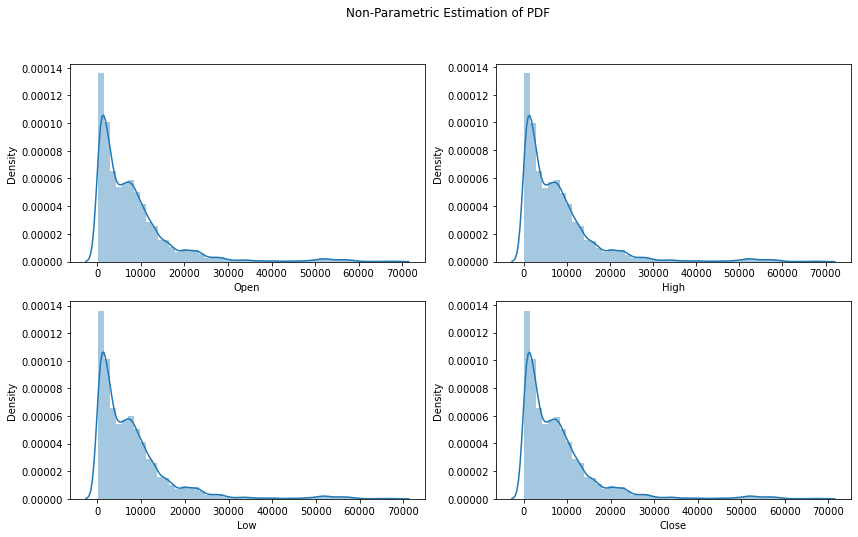

In [207]:
# initialize figure canvas
fig, ax = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle('Non-Parametric Estimation of PDF')

# plot Open variable
# sns.histplot(data=stock, x='Open', ax=ax[0,0], kde=True)
sns.distplot(stock['Open'], ax=ax[0,0], kde=True)

# plot High variable
# sns.histplot(data=stock, x='High', ax=ax[0,1], kde=True)
sns.distplot(stock['High'], ax=ax[0,1], kde=True)

# plot Low variable
# sns.histplot(data=stock, x='Low', ax=ax[1,0], kde=True)
sns.distplot(stock['Low'], ax=ax[1,0], kde=True)

# plot Close variable
# sns.histplot(data=stock, x='Close', ax=ax[1,1], kde=True)
sns.distplot(stock['Close'], ax=ax[1,1], kde=True)

plt.show()

Task #3 - Estimation of Order Statistics
========================================
Represent order of statistics as box-whisker plot

In [188]:
_open = stock['Open'].to_numpy()
_high = stock['High'].to_numpy()
_low = stock['Low'].to_numpy()
_close = stock['Close'].to_numpy()

# order statistics Open variable
open_quantiles = [np.quantile(_open, 0.1), np.quantile(_open, 0.25), np.quantile(_open, 0.5), np.quantile(_open, 0.75), np.quantile(_open, 0.9)]

# order statistics High variable
high_quantiles = [np.quantile(_high, 0.1), np.quantile(_high, 0.25), np.quantile(_high, 0.5), np.quantile(_high, 0.75), np.quantile(_high, 0.9)]

# order statistics Low variable
low_quantiles = [np.quantile(_low, 0.1), np.quantile(_low, 0.25), np.quantile(_low, 0.5), np.quantile(_low, 0.75), np.quantile(_low, 0.9)]

# order statistics Close variable
close_quantiles = [np.quantile(_close, 0.1), np.quantile(_close, 0.25), np.quantile(_close, 0.5), np.quantile(_close, 0.75), np.quantile(_close, 0.9)]


print('Open: ',open_quantiles)
print('High: ', high_quantiles)
print('Low: ', low_quantiles)
print('Close: ', close_quantiles)

Open:  [662.6460024, 2046.887756, 5772.1401365, 10487.377445, 17232.255276]
High:  [665.5390197, 2057.2139895, 5812.764892499999, 10552.179689999999, 17339.213085]
Low:  [659.8420104, 2037.18594325, 5725.199951, 10416.0922875, 17070.816994999997]
Close:  [662.5950134000001, 2047.5064699999998, 5773.710205, 10488.62256, 17211.635936]


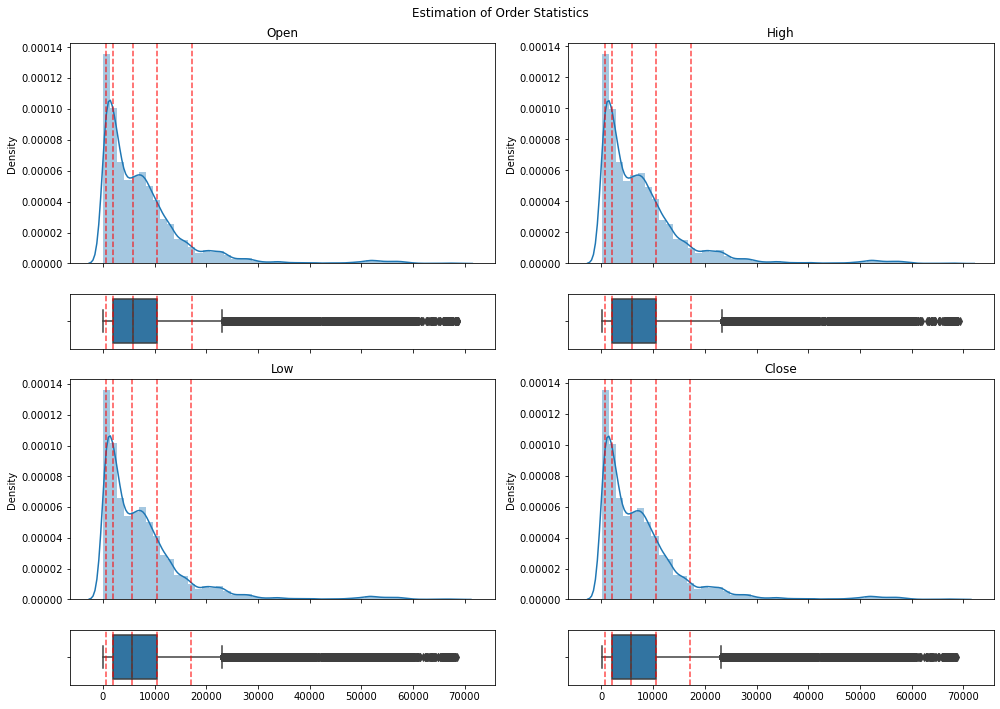

In [206]:
fig, ax = plt.subplots(4,2, figsize=(14,10), sharex=True, gridspec_kw={'height_ratios': [2,0.5,2,0.5]})
fig.suptitle('Estimation of Order Statistics')

# Open variable
# KDE plot
sns.distplot(_open, kde=True, ax=ax[0,0])
for q in open_quantiles:
    ax[0,0].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[0,0].set_title('Open')

# box-whisker plot
sns.boxplot(x=_open, ax=ax[1,0])
for q in open_quantiles:
    ax[1,0].axvline(q, color='r', linestyle='--', alpha=0.7)


# High variable
# KDE plot
sns.distplot(_high, kde=True, ax=ax[0,1])
for q in high_quantiles:
    ax[0,1].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[0,1].set_title('High')

# box-whisker plot
sns.boxplot(x=_high, ax=ax[1,1])
for q in high_quantiles:
    ax[1,1].axvline(q, color='r', linestyle='--', alpha=0.7)


# Low variable
# KDE plot
sns.distplot(_low, kde=True, ax=ax[2,0])
for q in low_quantiles:
    ax[2,0].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[2,0].set_title('Low')

# box-whisker plot
sns.boxplot(x=_low, ax=ax[3,0])
for q in low_quantiles:
    ax[3,0].axvline(q, color='r', linestyle='--', alpha=0.7)


# Close variable
# KDE plot
sns.distplot(_close, kde=True, ax=ax[2,1])
for q in close_quantiles:
    ax[2,1].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[2,1].set_title('Close')

# box-whisker plot
sns.boxplot(x=_close, ax=ax[3,1])
for q in close_quantiles:
    ax[3,1].axvline(q, color='r', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
